<a href="https://colab.research.google.com/github/PariaGhaheri/Classification_of_Parkinson_Disease/blob/main/ROC_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axisartist.axislines import SubplotZero
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import HTML, display, clear_output
from sklearn.metrics import auc
import numpy as np
import pandas as pd
import statistics as st
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

# Labels of the plot

In [ ]:

matplotlib.rcdefaults()
plt.rcParams.update({'xtick.labelsize':10, 
                     'ytick.labelsize':10,
                     'legend.fontsize':12,
                     'axes.edgecolor' : 'black',
                     'legend.title_fontsize' : 15,
                     'figure.figsize': (12,12),
                     'axes.labelsize' :18})


def mplot(y, ax, lw = 1):
  f_x, t_x, _ = roc_curve(y, pred1)
  f_l, t_l, _ = roc_curve(y, pred2)
  f_g, t_g, _ = roc_curve(y, pred3)
  f_b, t_b, _ = roc_curve(y, pred4)
  f_RN51, t_RN51, _ = roc_curve(y, final_predi)

  ax.axis['top'].set_visible(False)
  ax.axis['right'].set_visible(False)
  ax.spines['bottom'].set_color('black')
  ax.spines['left'].set_color('black')

  ax.plot(f_x, t_x, color="#E53935", lw=lw, label= f" (AUC = {auc(f_x, t_x):.4f})  XGBoost   ")
  ax.plot(f_l, t_l, color="#4FC3F7", lw=lw, label= f" (AUC = {auc(f_l, t_l):.4f})  LightGBM   ")
  ax.plot(f_g, t_g, color="#66BB6A", lw=lw, label= f" (AUC = {auc(f_g, t_g):.4f})  Gradient boosting       ")
  ax.plot(f_b, t_b, color="#CF7345", lw=lw, label= f" (AUC = {auc(f_b, t_b):.4f})  Bagging      ")
  ax.plot(f_RN51, t_RN51, color="#000000", lw=lw, label= f" (AUC = {auc(f_RN51, t_RN51):.4f})  Hard Voting         ")
  ax.plot([0, 1], [0, 1], color="#ECEFF1", lw=2.5, linestyle="--")


# Classification

In [ ]:
dataset = pd.read_csv('ReplicatedAcousticFeatures_PD.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
sc = StandardScaler()
X = sc.fit_transform(X)

model2 = lgb.LGBMClassifier()
model1 = XGBClassifier(eta=0.001, gamma=0, n_estimators=94)
model3= GradientBoostingClassifier()
model4 = BaggingClassifier(XGBClassifier(eta=0.001, gamma=0, n_estimators=94))
model = VotingClassifier(estimators=[('lgb', model2),('xgb', model1), ('gb', model3), ('bc', model4)],weights=(6,13,6,1), voting='hard')


kf = KFold(n_splits=4, random_state=5404, shuffle=True)
y_pred = cross_val_predict(model, X, y, cv=kf)
pred11 = cross_val_predict(model1, X, y, cv=kf)
pred22 = cross_val_predict(model2, X, y, cv=kf)
pred33 = cross_val_predict(model3, X, y, cv=kf)
pred44 = cross_val_predict(model4, X, y, cv=kf)

final_predi = np.array([])
final = np.array([])
for i in range(240):
  final_predi = np.append(final_predi, ( ((13*pred11[i])+(6*pred22[i])+(6*pred33[i])+(pred44[i])) / 26 ) ) 
  final = np.append(         final, (           1 if  ((   (13*pred11[i]) + (6*pred22[i]) + (6*pred33[i]) + (pred44[i])          ) / 26 )  > 0.5  else 0            )                     )



import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs1 = cross_val_predict(model1, X, y, cv=kf, method='predict_proba')
probs2 = cross_val_predict(model2, X, y, cv=kf, method='predict_proba')
probs3 = cross_val_predict(model3, X, y, cv=kf, method='predict_proba')
probs4 = cross_val_predict(model4, X, y, cv=kf, method='predict_proba')
#probs = model1.predict_proba(X)
pred1 = probs1[:,1]
pred2 = probs2[:,1]
pred3 = probs3[:,1]
pred4 = probs4[:,1]
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
sc = StandardScaler()
X = sc.fit_transform(X)

model2 = lgb.LGBMClassifier()
model1 = XGBClassifier(eta=0.001, gamma=0, n_estimators=94)
model3= GradientBoostingClassifier()
model4 = BaggingClassifier(XGBClassifier(eta=0.001, gamma=0, n_estimators=94))
model = VotingClassifier(estimators=[('lgb', model2),('xgb', model1), ('gb', model3), ('bc', model4)],weights=(6,13,6,1), voting='hard')


kf = KFold(n_splits=4, random_state=5404, shuffle=True)

y_pred = cross_val_predict(model, X, y, cv=kf)
pred11 = cross_val_predict(model1, X, y, cv=kf)
pred22 = cross_val_predict(model2, X, y, cv=kf)
pred33 = cross_val_predict(model3, X, y, cv=kf)
pred44 = cross_val_predict(model4, X, y, cv=kf)

final_predi = np.array([])
final = np.array([])
for i in range(240):
  final_predi = np.append(final_predi, ( ((13*pred11[i])+(6*pred22[i])+(6*pred33[i])+(pred44[i])) / 26 ) ) 
  final = np.append(         final, (           1 if  ((   (13*pred11[i]) + (6*pred22[i]) + (6*pred33[i]) + (pred44[i])          ) / 26 )  > 0.5  else 0            )                     )


# calculate the fpr and tpr for all thresholds of the classification
probs1 = cross_val_predict(model1, X, y, cv=kf, method='predict_proba')
probs2 = cross_val_predict(model2, X, y, cv=kf, method='predict_proba')
probs3 = cross_val_predict(model3, X, y, cv=kf, method='predict_proba')
probs4 = cross_val_predict(model4, X, y, cv=kf, method='predict_proba')
#probs = model1.predict_proba(X)
pred1 = probs1[:,1]
pred2 = probs2[:,1]
pred3 = probs3[:,1]
pred4 = probs4[:,1]


# Visualize ROC

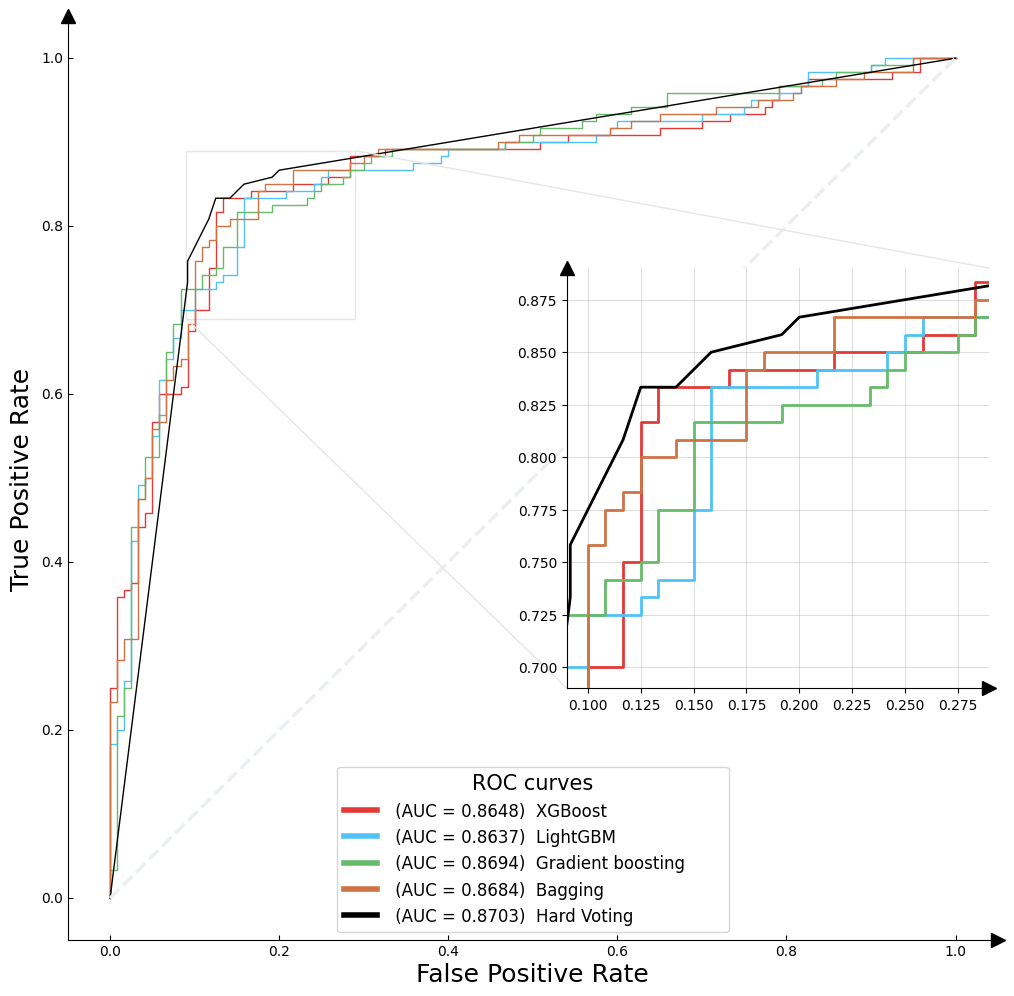

In [ ]:
fig = plt.figure(1)
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)
mplot(y, ax)
ax.plot(-0.05, 1.05, ls="", marker="^", ms=10, color="k", clip_on=False)
ax.plot(1.05, -0.05, ls="", marker=">", ms=10, color="k", clip_on=False)
ax.set_ylim((-0.05), (1.05))
ax.set_xlim((-0.05), (1.05))
ax.grid(linewidth = 0)
ax.set_facecolor('white')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
leg = plt.legend(loc="lower center", title = f"ROC curves")

for line in leg.get_lines():
    line.set_linewidth(4.0)


axin1 = zoomed_inset_axes(ax, 2.5, loc='right')
mplot(y, axin1, 2)
axin1.plot(0.09, 0.89, ls="", marker="^", ms=10, color="k", clip_on=False)
axin1.plot(0.29, 0.69, ls="", marker=">", ms=10, color="k", clip_on=False)
axin1.set_xlim(0.09, 0.29)
axin1.set_ylim(0.69, 0.89)
axin1.grid(linewidth = 0.4, color='#C3C3C3')
axin1.set_facecolor('white')
axin1.spines['bottom'].set_color('black')
axin1.spines['left'].set_color('black')

mark_inset(ax, axin1, loc1=1, loc2=3, fc="none", ec="0.9")


plt.savefig("ROC_Curve3.png", format="png", bbox_inches='tight')
plt.savefig("ROC_Curve3.svg", format="svg", bbox_inches='tight')
plt.show()

